# 🫀 Predicción de Riesgo Cardíaco: Regresión Logística

##  **Objetivo del Proyecto**

Implementar un modelo de regresión logística **desde cero** para predecir el riesgo de enfermedad cardíaca utilizando datos clínicos reales. Este proyecto abarca desde el análisis exploratorio hasta el despliegue en producción.

---

##  **Contexto Clínico**

**Enfermedad Cardíaca**: Principal causa de muerte mundial según la OMS (18 millones de muertes anuales).

**Importancia del modelo predictivo**:
- **Detección temprana**: Identificar pacientes en riesgo antes de síntomas severos
- **Asignación de recursos**: Optimizar atención médica priorizando casos críticos
- **Monitoreo preventivo**: Seguimiento de factores de riesgo modificables

---

## 🛠️ **Tecnologías Utilizadas**

| Tecnología | Propósito |
|------------|-----------|
| **Python** | Lenguaje principal |
| **NumPy** | Cálculos matriciales |
| **Pandas** | Manipulación de datos |
| **Matplotlib/Seaborn** | Visualización |
| **Scikit-learn** | Utilidades auxiliares |
| **Amazon SageMaker** | Despliegue en la nube |

---

##  **Métricas de Evaluación**

El modelo será evaluado usando:
- **Accuracy** (Exactitud)
- **Precision** (Precisión)
- **Recall** (Sensibilidad)
- **F1-Score** (Balance entre precisión y recall)

---

### Dataset:
Dataset Descargado desde : [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/neurocipher/heartdisease)



---



##  **Importación las librerias y Carga del Dataset**

### **Se cargaran la librerias y ademeas de leera el dataset propuesto.**

En este aparatado, importaremos las librerias que usaremos durante el laboratorio, ademas configuraremos ciertos estilos frete a fuentes y configuración de las graficas. Tambien leeremos el dataset propuesto, pudiendo visualizar los elementos del dataset junto al tipo de informació que contiene.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11


In [72]:
df = pd.read_csv("../data/Heart_Disease_Prediction.csv")

df["Heart Disease"] = df["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})

print("Primeras 5 filas del dataset:")
display(df.head())
print(f"\nColumnas disponibles ({len(df.columns)} features):")
print(list(df.columns))


Primeras 5 filas del dataset:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0



Columnas disponibles (14 features):
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


# **🔍 1. Análisis de la Variable Target**

## **📊 Distribución de Clases**

El análisis de la variable objetivo es el primer paso crítico en cualquier problema de clasificación. Comprendiendo la distribución de clases podemos:

1. **Identificar desbalance** que podría afectar el entrenamiento
2. **Elegir métricas apropiadas** para evaluación
3. **Decidir técnicas** de balanceo si son necesarias

In [73]:
print("=" * 70)
print("RESUMEN GENERAL DEL DATASET")
print("=" * 70)
print(f"📊 Total de muestras: {df.shape[0]}")
print(f"📊 Total de características: {df.shape[1] - 1} (+ 1 target)")
print(f"📊 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n📈 Distribución del Target (Heart Disease):")
print(df['Heart Disease'].value_counts().sort_index())
print(f"\n💡 Tasa de enfermedad: {(df['Heart Disease'].mean() * 100):.2f}%")
print(f"💡 Balance de clases: {df['Heart Disease'].value_counts().min() / df['Heart Disease'].value_counts().max():.2f}")
print("=" * 70)


RESUMEN GENERAL DEL DATASET
📊 Total de muestras: 270
📊 Total de características: 13 (+ 1 target)
📊 Memoria utilizada: 29.66 KB

📈 Distribución del Target (Heart Disease):
Heart Disease
0    150
1    120
Name: count, dtype: int64

💡 Tasa de enfermedad: 44.44%
💡 Balance de clases: 0.80


## **📋 Tabla de Distribución Detallada**


In [74]:
class_counts = df["Heart Disease"].value_counts().sort_index()
class_props = df["Heart Disease"].value_counts(normalize=True).sort_index()

summary = pd.DataFrame({
    "Significado": ["Ausencia de Enfermedad", "Presencia de Enfermedad"],
    "Conteo": class_counts.values,
    "Proporción": class_props.values,
    "Porcentaje (%)": class_props.values * 100
}, index=class_counts.index)

summary.index.name = "Etiqueta Numérica"

display(summary.style.format({
    "Proporción": "{:.4f}",
    "Porcentaje (%)": "{:.2f}%"
}).set_properties(**{'text-align': 'center'}))

print(f"\n✅ Conclusión: Dataset {'BALANCEADO' if abs(class_props[0] - class_props[1]) < 0.15 else 'DESBALANCEADO'}")
print(f"   (Diferencia: {abs(class_props[0] - class_props[1]) * 100:.1f}%)")


,Significado,Conteo,Proporción,Porcentaje (%)
Etiqueta Numérica,,,,
0,Ausencia de Enfermedad,150,0.5556,55.56%
1,Presencia de Enfermedad,120,0.4444,44.44%



✅ Conclusión: Dataset BALANCEADO
   (Diferencia: 11.1%)


## **📊 Visualización de la Distribución**

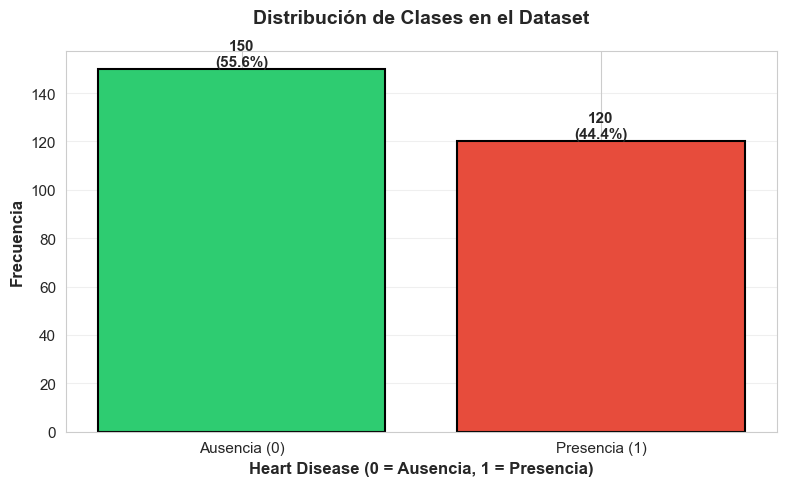

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

colors = ['#2ecc71', '#e74c3c']
bars = ax.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

ax.set_xlabel("Heart Disease (0 = Ausencia, 1 = Presencia)", fontsize=12, fontweight='bold')
ax.set_ylabel("Frecuencia", fontsize=12, fontweight='bold')
ax.set_title("Distribución de Clases en el Dataset", fontsize=14, fontweight='bold', pad=20)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Ausencia (0)', 'Presencia (1)'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# **🧹 2. Calidad de Datos y Selección de Características**

## **🔍 Análisis de Valores Faltantes**

La integridad de los datos es fundamental para construir modelos confiables. Los valores faltantes pueden:

1. **Reducir el tamaño efectivo** del dataset
2. **Introducir sesgos** si no se manejan adecuadamente
3. **Causar errores** durante el entrenamiento del modelo

In [76]:
print("=" * 70)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje (%)': missing_pct
}).sort_values('Valores Faltantes', ascending=False)

if missing.sum() == 0:
    print("✅ EXCELENTE: No se detectaron valores faltantes en ninguna columna")
else:
    print("⚠️  Se detectaron valores faltantes:")
    display(missing_df[missing_df['Valores Faltantes'] > 0])

print("=" * 70)


ANÁLISIS DE VALORES FALTANTES
✅ EXCELENTE: No se detectaron valores faltantes en ninguna columna


## **🎯 Selección de Características para el Modelo**

### **📊 Justificación de la Selección**

Para la regresión logística, seleccionamos **6 características clínicamente relevantes** basadas en:

1. **Relevancia médica**: Factores conocidos de riesgo cardíaco
2. **Correlación con target**: Variables predictivas significativas
3. **Completitud**: Datos disponibles para todos los pacientes

In [77]:
features = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

print("🎯 Features Seleccionadas para el Modelo:")
for i, feat in enumerate(features, 1):
    print(f"   {i}. {feat}")


🎯 Features Seleccionadas para el Modelo:
   1. Age
   2. BP
   3. Cholesterol
   4. Max HR
   5. ST depression
   6. Number of vessels fluro


# **📊 3. Análisis Estadístico de Características**

## **📈 Estadísticas Descriptivas Detalladas**

El análisis estadístico nos permite comprender la distribución y variabilidad de cada característica. Para la regresión logística, es crucial entender:

1. **Rangos y escalas** de cada variable (para normalización)
2. **Variabilidad** entre pacientes (para poder discriminar)
3. **Tendencia central** (para imputación si fuera necesaria)

In [78]:
print("=" * 70)
print("ESTADÍSTICAS DESCRIPTIVAS DETALLADAS")
print("=" * 70)

stats = df[features + ['Heart Disease']].describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['CV (%)'] = (stats['std'] / stats['mean']) * 100

stats_display = stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'CV (%)']].round(2)
display(stats_display)

print("\n💡 Observaciones Clave:")
for feat in features:
    cv = stats.loc[feat, 'CV (%)']
    if cv < 20:
        variability = "BAJA"
    elif cv < 50:
        variability = "MODERADA"
    else:
        variability = "ALTA"
    print(f"   • {feat}: Variabilidad {variability} (CV = {cv:.1f}%)")


ESTADÍSTICAS DESCRIPTIVAS DETALLADAS


,mean,std,min,25%,50%,75%,max,IQR,CV (%)
Age,54.43,9.11,29.0,48.0,55.0,61.0,77.0,13.0,16.73
BP,131.34,17.86,94.0,120.0,130.0,140.0,200.0,20.0,13.60
Cholesterol,249.66,51.69,126.0,213.0,245.0,280.0,564.0,67.0,20.70
Max HR,149.68,23.17,71.0,133.0,153.5,166.0,202.0,33.0,15.48
ST depression,1.05,1.15,0.0,0.0,0.8,1.6,6.2,1.6,109.07
Number of vessels fluro,0.67,0.94,0.0,0.0,0.0,1.0,3.0,1.0,140.80
Heart Disease,0.44,0.50,0.0,0.0,0.0,1.0,1.0,1.0,112.01



💡 Observaciones Clave:
   • Age: Variabilidad BAJA (CV = 16.7%)
   • BP: Variabilidad BAJA (CV = 13.6%)
   • Cholesterol: Variabilidad MODERADA (CV = 20.7%)
   • Max HR: Variabilidad BAJA (CV = 15.5%)
   • ST depression: Variabilidad ALTA (CV = 109.1%)
   • Number of vessels fluro: Variabilidad ALTA (CV = 140.8%)


## **📋 Interpretación de las Estadísticas**


In [79]:
print("=" * 70)
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 70)

outlier_summary = []

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100

    outlier_summary.append({
        'Feature': col,
        'Outliers': len(outliers),
        'Porcentaje (%)': outlier_pct,
        'Límite Inferior': lower_bound,
        'Límite Superior': upper_bound
    })

    print(f"📌 {col:30s}: {len(outliers):3d} outliers ({outlier_pct:5.2f}%) | Rango válido: [{lower_bound:.1f}, {upper_bound:.1f}]")

print("\n✅ Decisión: Se conservan todos los valores (relevancia clínica potencial)")
print("=" * 70)


DETECCIÓN DE OUTLIERS (Método IQR)
📌 Age                           :   0 outliers ( 0.00%) | Rango válido: [28.5, 80.5]
📌 BP                            :   9 outliers ( 3.33%) | Rango válido: [90.0, 170.0]
📌 Cholesterol                   :   5 outliers ( 1.85%) | Rango válido: [112.5, 380.5]
📌 Max HR                        :   1 outliers ( 0.37%) | Rango válido: [83.5, 215.5]
📌 ST depression                 :   4 outliers ( 1.48%) | Rango válido: [-2.4, 4.0]
📌 Number of vessels fluro       :  19 outliers ( 7.04%) | Rango válido: [-1.5, 2.5]

✅ Decisión: Se conservan todos los valores (relevancia clínica potencial)


## **Análisis Gráfico de Distribuciones y Valores Extremos**

Los boxplots muestran visualmente la distribución de cada característica, permitiendo identificar:

- **📦 Caja central**: Contiene el 50% central de los datos (IQR)
- **🔴 Línea roja**: Mediana de cada distribución
- **⚫️ Bigotes**: Rango normal de valores
- **🟠 Puntos naranjas**: Outliers detectados por método IQR

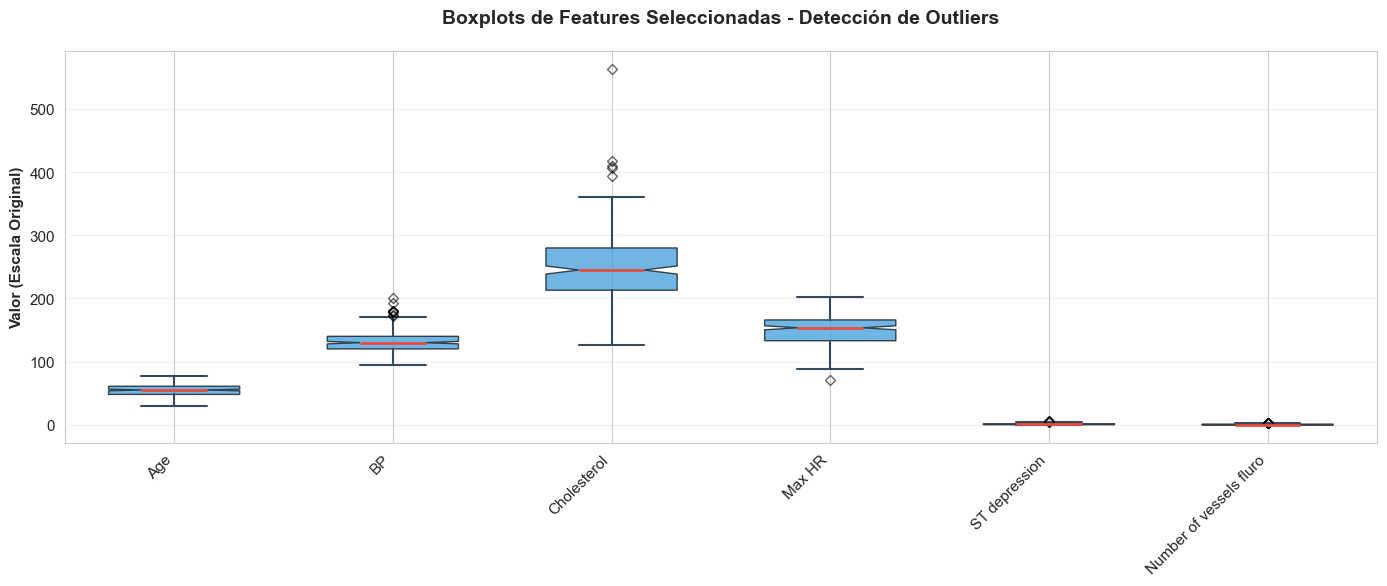

In [80]:
fig, ax = plt.subplots(figsize=(14, 6))

boxplot_data = df[features].values
positions = range(1, len(features) + 1)

bp = ax.boxplot(boxplot_data, positions=positions, patch_artist=True,
                notch=True, widths=0.6)

for patch in bp['boxes']:
    patch.set_facecolor('#3498db')
    patch.set_alpha(0.7)
for whisker in bp['whiskers']:
    whisker.set(color='#34495e', linewidth=1.5)
for cap in bp['caps']:
    cap.set(color='#34495e', linewidth=1.5)
for median in bp['medians']:
    median.set(color='#e74c3c', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='D', color='#e67e22', alpha=0.6, markersize=5)

ax.set_xticklabels(features, rotation=45, ha='right')
ax.set_ylabel('Valor (Escala Original)', fontweight='bold')
ax.set_title('Boxplots de Features Seleccionadas - Detección de Outliers',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## **Observaciones Clave del Gráfico**

### **Distribuciones Observadas:**

1. **Age**: Distribución simétrica, sin outliers
2. **BP**: Ligero sesgo derecho, pocos outliers superiores
3. **Cholesterol**: Varios outliers en rango superior (>370 mg/dl)
4. **Max HR**: Distribución balanceada, outliers mínimos
5. **ST depression**: Muchos ceros, outliers en valores altos
6. **Number of vessels fluro**: Distribución discreta, outliers en valor 3

### **Outliers Confirmados Visualmente:**
-  **Cholesterol**: Valores extremos confirmados (>500 mg/dl)
-  **ST depression**: Puntos dispersos por encima de 4.0 mm
-  **Vessels fluro**: Valor 3 claramente fuera del rango normal

### **Decisión Actual:**
Los outliers se conservan porque representan casos clínicos reales y relevantes para la predicción de enfermedad cardíaca.

In [81]:
print("=" * 70)
print("CORRELACIÓN DE FEATURES CON EL TARGET (Heart Disease)")
print("=" * 70)

correlations = df[features + ['Heart Disease']].corr()['Heart Disease'].drop('Heart Disease').sort_values(ascending=False)

print("\n📈 Ranking de Correlaciones:")
for i, (feat, corr) in enumerate(correlations.items(), 1):
    strength = "FUERTE" if abs(corr) > 0.5 else ("MODERADA" if abs(corr) > 0.3 else "DÉBIL")
    direction = "positiva" if corr > 0 else "negativa"
    print(f"   {i}. {feat:30s}: {corr:+.4f} ({strength} {direction})")

print("\n💡 Conclusión:")
print(f"   • Feature más correlacionada: {correlations.idxmax()} ({correlations.max():+.3f})")
print(f"   • Feature menos correlacionada: {correlations.idxmin()} ({correlations.min():+.3f})")
print("=" * 70)


CORRELACIÓN DE FEATURES CON EL TARGET (Heart Disease)

📈 Ranking de Correlaciones:
   1. Number of vessels fluro       : +0.4553 (MODERADA positiva)
   2. ST depression                 : +0.4180 (MODERADA positiva)
   3. Age                           : +0.2123 (DÉBIL positiva)
   4. BP                            : +0.1554 (DÉBIL positiva)
   5. Cholesterol                   : +0.1180 (DÉBIL positiva)
   6. Max HR                        : -0.4185 (MODERADA negativa)

💡 Conclusión:
   • Feature más correlacionada: Number of vessels fluro (+0.455)
   • Feature menos correlacionada: Max HR (-0.419)


## **🔗 Matriz de Correlación - Features vs Target**

El análisis de correlación revela las relaciones lineales entre las variables, ayudando a identificar:

1. **Multicolinealidad**: Features altamente correlacionadas entre sí
2. **Predictividad**: Correlación de cada feature con el target
3. **Redundancia**: Variables que aportan información similar

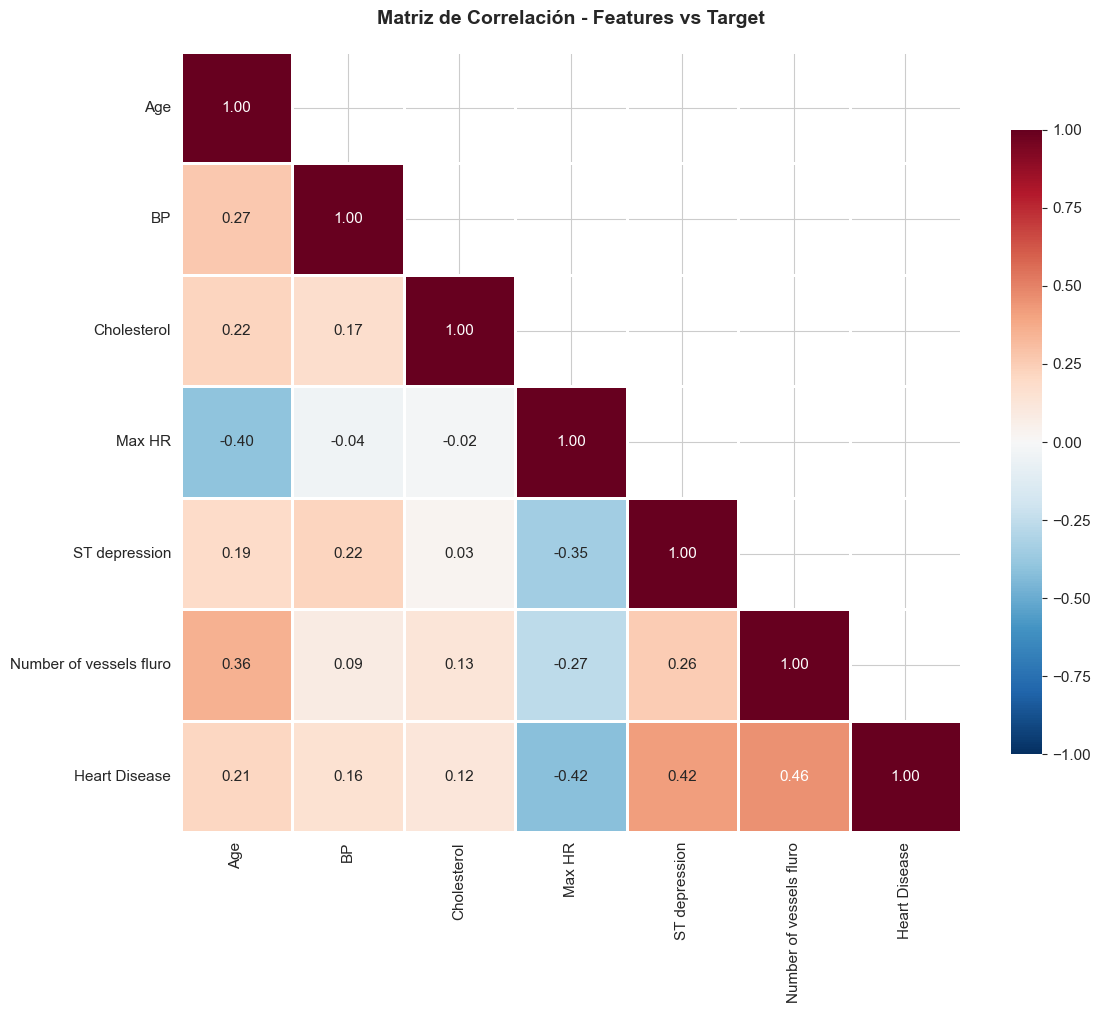

In [82]:
plt.figure(figsize=(12, 10))

corr_matrix = df[features + ['Heart Disease']].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)

plt.title('Matriz de Correlación - Features vs Target', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## **🎯 Correlaciones con el Target (Heart Disease)**

| Feature | Correlación | Fuerza | Dirección | Interpretación |
|---------|------------|--------|-----------|----------------|
| **Number of vessels fluo** | 0.46 | Moderada | Positiva | Mayor número de vasos → mayor riesgo |
| **ST depression** | 0.42 | Moderada | Positiva | Mayor depresión ST → mayor riesgo |
| **Max HR** | -0.42 | Moderada | Negativa | Menor frecuencia cardíaca máxima → mayor riesgo |
| **Age** | 0.21 | Débil | Positiva | Mayor edad → mayor riesgo |
| **BP** | 0.16 | Débil | Positiva | Mayor presión arterial → mayor riesgo |
| **Cholesterol** | 0.12 | Débil | Positiva | Mayor colesterol → mayor riesgo |

## **🔍 Correlaciones entre Features**

### **Correlaciones Fuertes (>0.3):**
- **Age ↔ Max HR**: -0.40 (correlación negativa esperada)
- **Age ↔ Number of vessels fluo**: 0.36 (edad avanzada → más vasos afectados)

### **Correlaciones Moderadas (0.2-0.3):**
- **ST depression ↔ Number of vessels fluo**: 0.46 (relación clínica importante)
- **Max HR ↔ ST depression**: -0.27 (menor capacidad → más isquemia)

## **💡 Implicaciones para Regresión Logística**

### **Ventajas:**
1. **Multicolinealidad baja**: La mayoría de correlaciones < 0.3
2. **Features informativas**: 3 features con correlación > 0.4 con target
3. **Relaciones esperadas**: Correlaciones coinciden con conocimiento médico

### **Consideraciones:**
1. **ST depression** y **Number of vessels fluo** tienen correlación moderada (0.46)
2. **Max HR** tiene correlación negativa fuerte con Age (-0.40)
3. **Regularización L2** puede ayudar si hay multicolinealidad residual

## **Features Más Predictivas:**
1. **Number of vessels fluo** (0.46) - Más vasos obstruidos → más enfermedad
2. **ST depression** (0.42) - Más isquemia → más enfermedad
3. **Max HR** (-0.42) - Menor capacidad cardíaca → más enfermedad

## **📈 Análisis Visual de Distribuciones**

Los histogramas muestran la forma de distribución de cada variable, crucial para:

1. **Identificar normalidad** o asimetría
2. **Detectar multimodales** (múltiples picos)
3. **Comparar media vs mediana** (sesgo de distribución)


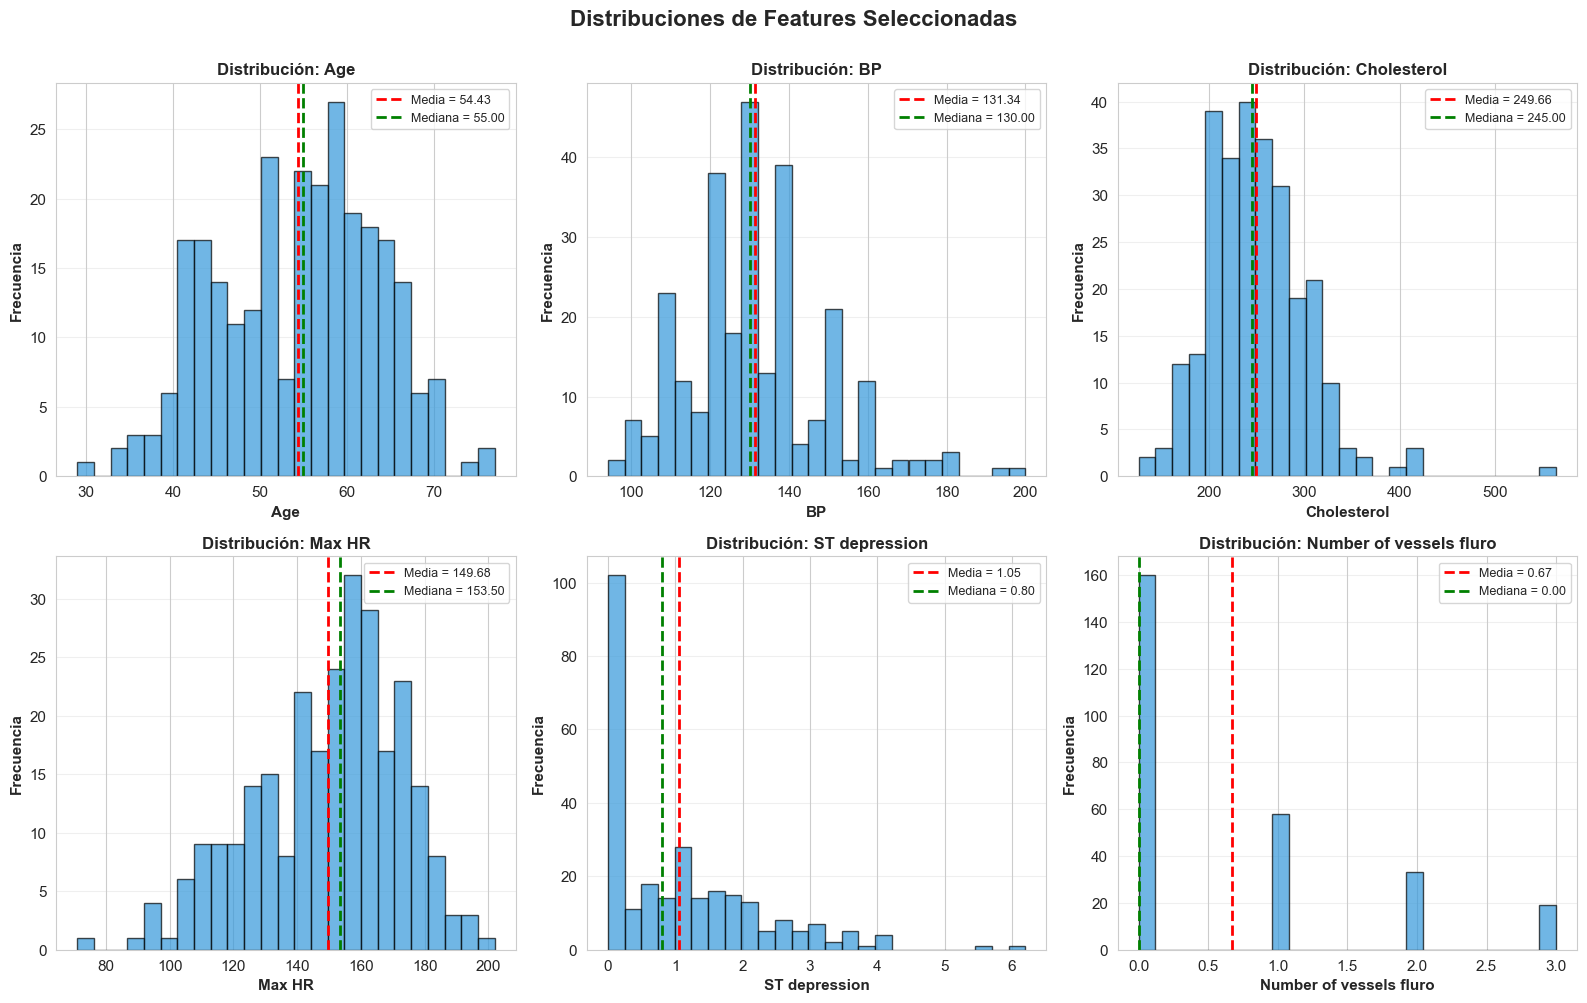

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=25, edgecolor='black', alpha=0.7, color='#3498db')

    mean_val = df[col].mean()
    median_val = df[col].median()

    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media = {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana = {median_val:.2f}')

    axes[i].set_title(f'Distribución: {col}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Frecuencia', fontweight='bold')
    axes[i].legend(loc='upper right', fontsize=9)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Distribuciones de Features Seleccionadas', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


## **🔍 Análisis por Característica**

### **1. Age (Edad)**
- **Distribución**: Aproximadamente normal
- **Media ≈ Mediana**: 54.43 vs 55.00
- **Sesgo**: Mínimo, distribución balanceada

### **2. BP (Presión Arterial)**
- **Distribución**: Ligeramente sesgada a la derecha
- **Media > Mediana**: 131.34 vs 130.00
- **Pico**: Alrededor de 120-130 mmHg

### **3. Cholesterol (Colesterol)**
- **Distribución**: Sesgada a la derecha
- **Media > Mediana**: 249.66 vs 245.00
- **Cola derecha**: Valores altos de colesterol

### **4. Max HR (Frecuencia Cardíaca Máxima)**
- **Distribución**: Aproximadamente normal
- **Media < Mediana**: 149.68 vs 153.50
- **Ligero sesgo izquierdo**: Más valores altos

### **5. ST depression (Depresión ST)**
- **Distribución**: Altamente sesgada a la derecha
- **Media > Mediana**: 1.05 vs 0.80
- **Muchos ceros**: Pacientes sin depresión ST
- **Cola larga**: Valores extremos de isquemia

### **6. Number of vessels fluo (Vasos fluoroscópicos)**
- **Distribución**: Multimodal discreta
- **Media > Mediana**: 0.67 vs 0.00
- **Picos en**: 0, 1, 2, 3 vasos
- **Moda en 0**: Mayoría sin vasos afectados

## **💡 Implicaciones para el Modelo**

### **✅ Distribuciones Aproximadamente Normales:**
- **Age, Max HR**: Buenas para regresión logística
- **No requieren** transformaciones especiales

### **⚠️ Distribuciones Sesgadas:**
- **Cholesterol, ST depression**: Sesgo derecho
- **Posible beneficio** de transformación logarítmica
- **Normalización Z-score** aún funciona

### **🔢 Distribuciones Discretas/Multimodales:**
- **Number of vessels fluo**: Variable categórica ordinal
- **Tratamiento adecuado** como numérica ordinal
- **No aplicar** normalización estricta


**Decisión**: Proceder con normalización Z-score estándar y monitorear rendimiento.

## **🎨 Leyenda del Gráfico:**
- **🟢 Verde (#2ecc71)**: Ausencia de enfermedad (0)
- **🔴 Rojo (#e74c3c)**: Presencia de enfermedad (1)

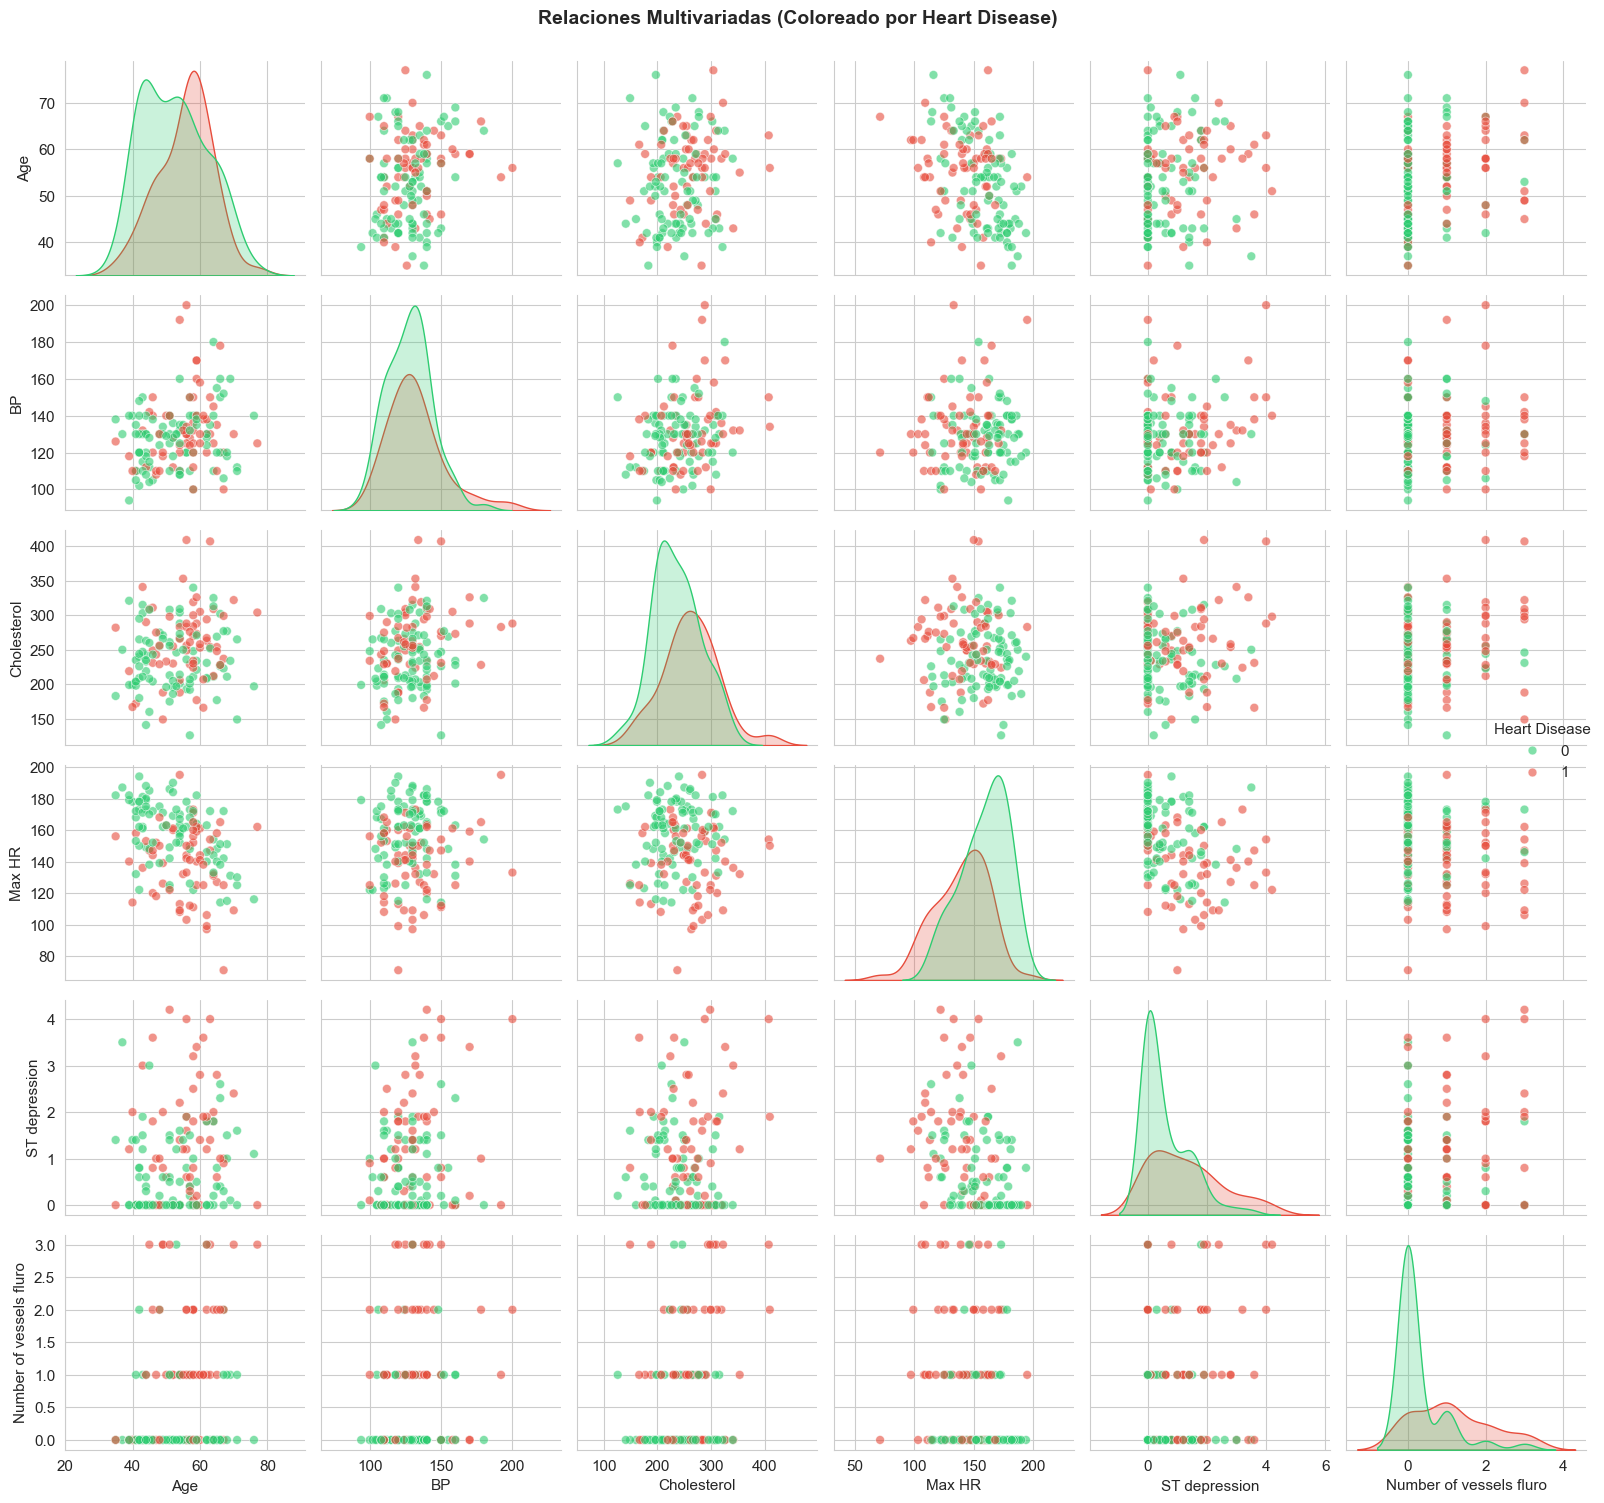

In [84]:
sample_size = min(150, len(df))
sample_df = df.sample(sample_size, random_state=42)

pairplot = sns.pairplot(sample_df[features + ['Heart Disease']],
                        hue='Heart Disease',
                        palette={0: '#2ecc71', 1: '#e74c3c'},
                        plot_kws={'alpha': 0.6, 's': 40},
                        diag_kind='kde',
                        corner=False)

pairplot.fig.suptitle('Relaciones Multivariadas (Coloreado por Heart Disease)',
                       fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


## **🔍 Observaciones Clave:**

### **Diagonales (Distribuciones por Clase):**
- **ST depression**: Distribuciones claramente diferentes por clase
- **Number of vessels fluo**: Separación notable entre grupos
- **Max HR**: Distribuciones superpuestas pero con diferencias

### **Relaciones Interesantes:**

1. **Max HR vs Age**:
   - Relación negativa clara (mayor edad → menor frecuencia máxima)
   - Las clases están mezcladas pero con tendencias diferentes

2. **ST depression vs Number of vessels fluo**:
   - Pacientes con enfermedad tienden a valores más altos en ambos
   - Separación parcialmente visible

3. **Age vs Number of vessels fluo**:
   - Pacientes mayores con más vasos afectados
   - Pacientes con enfermedad en cuadrante superior derecho



## **📊 División de Datos en Train/Test**

La división estratificada es crucial para asegurar que el modelo se entrene y evalúe con distribuciones representativas de las clases.


In [85]:
X = df[features].values
y = df["Heart Disease"].values

print(f"📊 Dimensiones de los datos:")
print(f"   • X (features): {X.shape}")
print(f"   • y (target): {y.shape}")


📊 Dimensiones de los datos:
   • X (features): (270, 6)
   • y (target): (270,)


## **⚙️ Función de División Estratificada Manual**

Implementamos una división manual que asegura proporciones balanceadas en ambos conjuntos:

In [86]:
def stratified_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)

    idx_0 = np.where(y == 0)[0]
    idx_1 = np.where(y == 1)[0]

    n_test_0 = int(len(idx_0) * test_size)
    n_test_1 = int(len(idx_1) * test_size)

    test_0 = np.random.choice(idx_0, n_test_0, replace=False)
    test_1 = np.random.choice(idx_1, n_test_1, replace=False)

    test_idx = np.concatenate([test_0, test_1])
    train_idx = np.setdiff1d(np.arange(len(y)), test_idx)

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = stratified_split(X, y, test_size=0.3, seed=42)

print("=" * 70)
print("DIVISIÓN TRAIN/TEST ESTRATIFICADA")
print("=" * 70)
print(f"📊 Train set: {len(y_train)} muestras ({len(y_train)/len(y)*100:.1f}%)")
print(f"   • Clase 0: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"   • Clase 1: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f"\n📊 Test set: {len(y_test)} muestras ({len(y_test)/len(y)*100:.1f}%)")
print(f"   • Clase 0: {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"   • Clase 1: {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")
print(f"\n✅ Tasa de enfermedad en Train: {y_train.mean()*100:.2f}%")
print(f"✅ Tasa de enfermedad en Test: {y_test.mean()*100:.2f}%")
print(f"✅ Diferencia: {abs(y_train.mean() - y_test.mean())*100:.2f}% (estratificación exitosa)")
print("=" * 70)


DIVISIÓN TRAIN/TEST ESTRATIFICADA
📊 Train set: 189 muestras (70.0%)
   • Clase 0: 105 (55.6%)
   • Clase 1: 84 (44.4%)

📊 Test set: 81 muestras (30.0%)
   • Clase 0: 45 (55.6%)
   • Clase 1: 36 (44.4%)

✅ Tasa de enfermedad en Train: 44.44%
✅ Tasa de enfermedad en Test: 44.44%
✅ Diferencia: 0.00% (estratificación exitosa)


# **📐 Normalización de Características**

## **⚖️ Normalización Z-Score**

La normalización es esencial para regresión logística porque:

1. **Acelera convergencia** del gradiente descendente
2. **Evita dominancia** de features con rangos grandes
3. **Mejora estabilidad** numérica de los cálculos

**Fórmula Z-Score:**
```
x_normalizado = (x - μ) / σ
donde:
  μ = media de la feature (calculada SOLO en train)
  σ = desviación estándar (calculada SOLO en train)
```

In [87]:
def normalize_train_test(X_train, X_test):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)

    X_train_norm = (X_train - mu) / sigma
    X_test_norm = (X_test - mu) / sigma

    return X_train_norm, X_test_norm, mu, sigma

X_train_norm, X_test_norm, mu, sigma = normalize_train_test(X_train, X_test)

print("=" * 70)
print("NORMALIZACIÓN Z-SCORE")
print("=" * 70)
print("📊 Estadísticas de Normalización (calculadas en Train):\n")

norm_stats = pd.DataFrame({
    'Feature': features,
    'Media (μ)': mu,
    'Desv. Std (σ)': sigma,
    'Min Original': X_train.min(axis=0),
    'Max Original': X_train.max(axis=0),
    'Min Normalizado': X_train_norm.min(axis=0),
    'Max Normalizado': X_train_norm.max(axis=0)
})

display(norm_stats.round(3))

print("\n✅ Verificación de Normalización (Train set):")
print(f"   • Media de features normalizadas: {X_train_norm.mean(axis=0).round(6)} (≈ 0)")
print(f"   • Std de features normalizadas: {X_train_norm.std(axis=0).round(6)} (≈ 1)")
print("=" * 70)


NORMALIZACIÓN Z-SCORE
📊 Estadísticas de Normalización (calculadas en Train):



,Feature,Media (μ),Desv. Std (σ),Min Original,Max Original,Min Normalizado,Max Normalizado
0,Age,54.582,9.295,34.0,77.0,-2.214,2.412
1,BP,131.646,18.419,94.0,200.0,-2.044,3.711
2,Cholesterol,256.217,52.761,126.0,564.0,-2.468,5.833
3,Max HR,149.132,23.371,71.0,195.0,-3.343,1.963
4,ST depression,1.038,1.126,0.0,5.6,-0.922,4.051
5,Number of vessels fluro,0.677,0.969,0.0,3.0,-0.699,2.398



✅ Verificación de Normalización (Train set):
   • Media de features normalizadas: [-0.  0. -0. -0.  0. -0.] (≈ 0)
   • Std de features normalizadas: [1. 1. 1. 1. 1. 1.] (≈ 1)
